In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats

Target Variable is Price:
    
    Analysis of Car price:
    based on hybrid petrol
    based on car company
    based on km 
    based on owner

In [2]:
df = pd.read_csv(r"Downloads\mycar.csv")

In [3]:
df['car_company'] = df.car_name.apply(lambda x : x.split()[0])

In [4]:
df.head()

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date,car_company
0,\nPeugeot 3008 1.2\n - Allure +\n,"Rs 850,000",Pre-Owned Individual,Petrol,"105,000km",NaN,\nRef: 54543\n,Dec 2017,Peugeot
1,\nHonda Civic 1.6 Sedan\n,"Rs 425,000",Pre-Owned Individual,Petrol,"116,200km",NaN,\nRef: 54588\n,Aug 2012,Honda
2,\nMercedes-Benz C-class 1.5 Sedan\n - C180 AMG...,"Rs 2,700,000",Pre-Owned Individual,Hybrid/Petrol,"4,622km","\n\nRs 29,253/month \n\n* As per condition\n",\nRef: 54408\n,Jul 2023,Mercedes-Benz
3,\nKIA Cerato 1.6 Sedan\n - SX\n,"Rs 290,000",Pre-Owned Individual,Petrol,"83,049km",NaN,\nRef: 54671\n,Dec 2011,KIA
4,\nBMW 3-series 2.0 Sedan\n - Sport\n,"Rs 1,275,000",Pre-Owned Individual,Petrol,"106,000km",NaN,\nRef: 54685\n,Nov 2014,BMW


In [5]:
df["car_name"]=df["car_name"].str.replace('\n','')
df["price"]=df["price"].str.replace('Rs','').str.replace(',','')
df["km"]=df["km"].str.replace('km','').str.replace(',','')
df["ref"]=df["ref"].str.replace('\nRef:','').str.replace('\n','')
df["eml_month"]=df["eml_month"].str.replace('\n\nRs','').str.replace(',','').str.replace('\n\n','').str.replace('/month','').str.replace('*','')
df["eml_month"]=df["eml_month"].str.replace('\n','')
df['eml_month'] = df['eml_month'].str.replace('for 84 months','')


C:\Users\Abinay Rachakonda\AppData\Local\Temp\ipykernel_16456\413797276.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["eml_month"]=df["eml_month"].str.replace('\n\nRs','').str.replace(',','').str.replace('\n\n','').str.replace('/month','').str.replace('*','')


In [6]:
df.car_name.apply(lambda x : x.split())

0                      [Peugeot, 3008, 1.2, -, Allure, +]
1                              [Honda, Civic, 1.6, Sedan]
2       [Mercedes-Benz, C-class, 1.5, Sedan, -, C180, ...
3                        [KIA, Cerato, 1.6, Sedan, -, SX]
4                   [BMW, 3-series, 2.0, Sedan, -, Sport]
                              ...                        
1447            [BMW, 4-series, 3.0, Coupe, -, 435i, F32]
1448                           [Seat, Ibiza, 1.0, -, ref]
1449                                 [Peugeot, 3008, 1.6]
1450                            [BMW, X1, 1.5, -, SDRIVE]
1451      [BMW, 3-series, 2.0, Sedan, -, 330i, Sportline]
Name: car_name, Length: 1452, dtype: object

In [7]:
df['eml_month'] = df['eml_month'].str.replace(' As per condition','')

In [8]:
df.head()

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date,car_company
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,NaN,54543,Dec 2017,Peugeot
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,NaN,54588,Aug 2012,Honda
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023,Mercedes-Benz
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,NaN,54671,Dec 2011,KIA
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,NaN,54685,Nov 2014,BMW


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       1452 non-null   object
 1   price          1452 non-null   object
 2   ower           1452 non-null   object
 3   hybrid_petrol  1452 non-null   object
 4   km             1152 non-null   object
 5   eml_month      794 non-null    object
 6   ref            1452 non-null   object
 7   date           1153 non-null   object
 8   car_company    1452 non-null   object
dtypes: object(9)
memory usage: 102.2+ KB


In [10]:
df.dropna

<bound method DataFrame.dropna of                                                car_name      price  \
0                           Peugeot 3008 1.2 - Allure +    850000    
1                                 Honda Civic 1.6 Sedan    425000    
2     Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...   2700000    
3                             KIA Cerato 1.6 Sedan - SX    290000    
4                        BMW 3-series 2.0 Sedan - Sport   1275000    
...                                                 ...        ...   
1447                  BMW 4-series 3.0 Coupe - 435i F32   1900000    
1448                               Seat Ibiza 1.0 - ref    885500    
1449                                   Peugeot 3008 1.6   1200000    
1450                                BMW X1 1.5 - SDRIVE   1190000    
1451            BMW 3-series 2.0 Sedan - 330i Sportline   2500000    

                        ower  hybrid_petrol      km eml_month     ref  \
0       Pre-Owned Individual         Petrol  105000 

In [11]:
df.head()

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date,car_company
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,NaN,54543,Dec 2017,Peugeot
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,NaN,54588,Aug 2012,Honda
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023,Mercedes-Benz
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,NaN,54671,Dec 2011,KIA
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,NaN,54685,Nov 2014,BMW


In [12]:
df.shape

(1452, 9)

In [12]:
df['eml_month']=df['eml_month'].replace(np.NaN,00)

In [13]:
report = df[df['eml_month']!=0]
    

In [14]:
report.to_csv(r"C:\Users\Abinay Rachakonda\Downloads\repor.csv")

In [15]:
df.isnull().sum()

car_name           0
price              0
ower               0
hybrid_petrol      0
km               300
eml_month          0
ref                0
date             299
car_company        0
dtype: int64

In [16]:
df.shape

(1452, 9)

In [17]:
df['date']=df['date'].replace(np.NaN,00)

In [19]:
report_1 = df[df['date']!=0]

In [20]:
report_1

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date,car_company
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,0,54543,Dec 2017,Peugeot
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,0,54588,Aug 2012,Honda
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023,Mercedes-Benz
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,0,54671,Dec 2011,KIA
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,0,54685,Nov 2014,BMW
...,...,...,...,...,...,...,...,...,...
1446,KIA Sportage 1.6,1049000,Local Pre-Owned dealer,Petrol,93000,0,47699,Jun 2018,KIA
1447,BMW 4-series 3.0 Coupe - 435i F32,1900000,Local Pre-Owned dealer,Petrol,61093,0,47580,Nov 2013,BMW
1449,Peugeot 3008 1.6,1200000,Local Pre-Owned dealer,Diesel,131524,0,47552,Apr 2018,Peugeot
1450,BMW X1 1.5 - SDRIVE,1190000,Local Pre-Owned dealer,Petrol,58000,0,45101,Jun 2016,BMW


In [21]:
df['km']=df['km'].replace(np.NaN,00)

In [22]:
report_2 = df[df['km']!=0]

In [23]:
report_2 

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date,car_company
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,0,54543,Dec 2017,Peugeot
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,0,54588,Aug 2012,Honda
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023,Mercedes-Benz
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,0,54671,Dec 2011,KIA
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,0,54685,Nov 2014,BMW
...,...,...,...,...,...,...,...,...,...
1446,KIA Sportage 1.6,1049000,Local Pre-Owned dealer,Petrol,93000,0,47699,Jun 2018,KIA
1447,BMW 4-series 3.0 Coupe - 435i F32,1900000,Local Pre-Owned dealer,Petrol,61093,0,47580,Nov 2013,BMW
1449,Peugeot 3008 1.6,1200000,Local Pre-Owned dealer,Diesel,131524,0,47552,Apr 2018,Peugeot
1450,BMW X1 1.5 - SDRIVE,1190000,Local Pre-Owned dealer,Petrol,58000,0,45101,Jun 2016,BMW


In [24]:
df.head()

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date,car_company
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,0,54543,Dec 2017,Peugeot
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,0,54588,Aug 2012,Honda
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023,Mercedes-Benz
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,0,54671,Dec 2011,KIA
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,0,54685,Nov 2014,BMW


In [9]:
df['car_company'] = df.car_name.apply(lambda x : x.split()[0])

In [10]:
df.head()

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date,car_company
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,NaN,54543,Dec 2017,Peugeot
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,NaN,54588,Aug 2012,Honda
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023,Mercedes-Benz
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,NaN,54671,Dec 2011,KIA
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,NaN,54685,Nov 2014,BMW


In [11]:
group_df = df.groupby('car_company')

In [12]:
df['car_company'].value_counts()

BMW                 231
Toyota              191
Mercedes-Benz       165
Honda               119
Nissan               95
KIA                  76
Suzuki               64
Audi                 62
Peugeot              42
Renault              42
Hyundai              40
Land                 37
Porsche              36
Jaguar               32
Ford                 31
Mazda                28
MINI                 19
Skoda                19
Volkswagen           16
Mitsubishi           15
Volvo                12
Jeep                 11
Seat                 11
Citroen               8
Haval                 7
Isuzu                 5
Infiniti              5
GWM                   4
Alfa                  4
Opel                  3
BYD                   3
MG                    2
Lexus                 2
Proton                2
Datsun                2
Fiat                  2
DS                    1
London                1
Chevrolet             1
Mercedes-Maybach      1
Perodua               1
Changan         

In [29]:
df['car_company'].nunique()

45

In [ ]:
df.pivot_table

In [31]:
discrete_df = df.select_dtypes(include=['object'])


In [32]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()


In [16]:
discrete_univariate_analysis(discrete_df)

********** car_name **********
count                                                   1452
nunique                                                 1039
unique     [Peugeot 3008 1.2 - Allure +, Honda Civic 1.6 ...
Name: car_name, dtype: object
Value Counts: 
 Honda Vezel 1.5                            13
Mercedes-Benz C-class 1.6 Sedan            12
BMW X1 1.5                                 11
Nissan Qashqai 1.2                         10
Toyota Vitz 1.0 Hatchback                  10
                                           ..
Honda CR-V 2.0 - Elegance                   1
Honda Amaze 1.2 - Comfort - MT              1
Honda Amaze 1.2 - Comfort - CVT             1
Honda Fit 1.5 - Elegance - CVT              1
BMW 3-series 2.0 Sedan - 330i Sportline     1
Name: car_name, Length: 1039, dtype: int64

********** ower **********
count                                                   1452
nunique                                                    5
unique     [Pre-Owned Individual, Local P

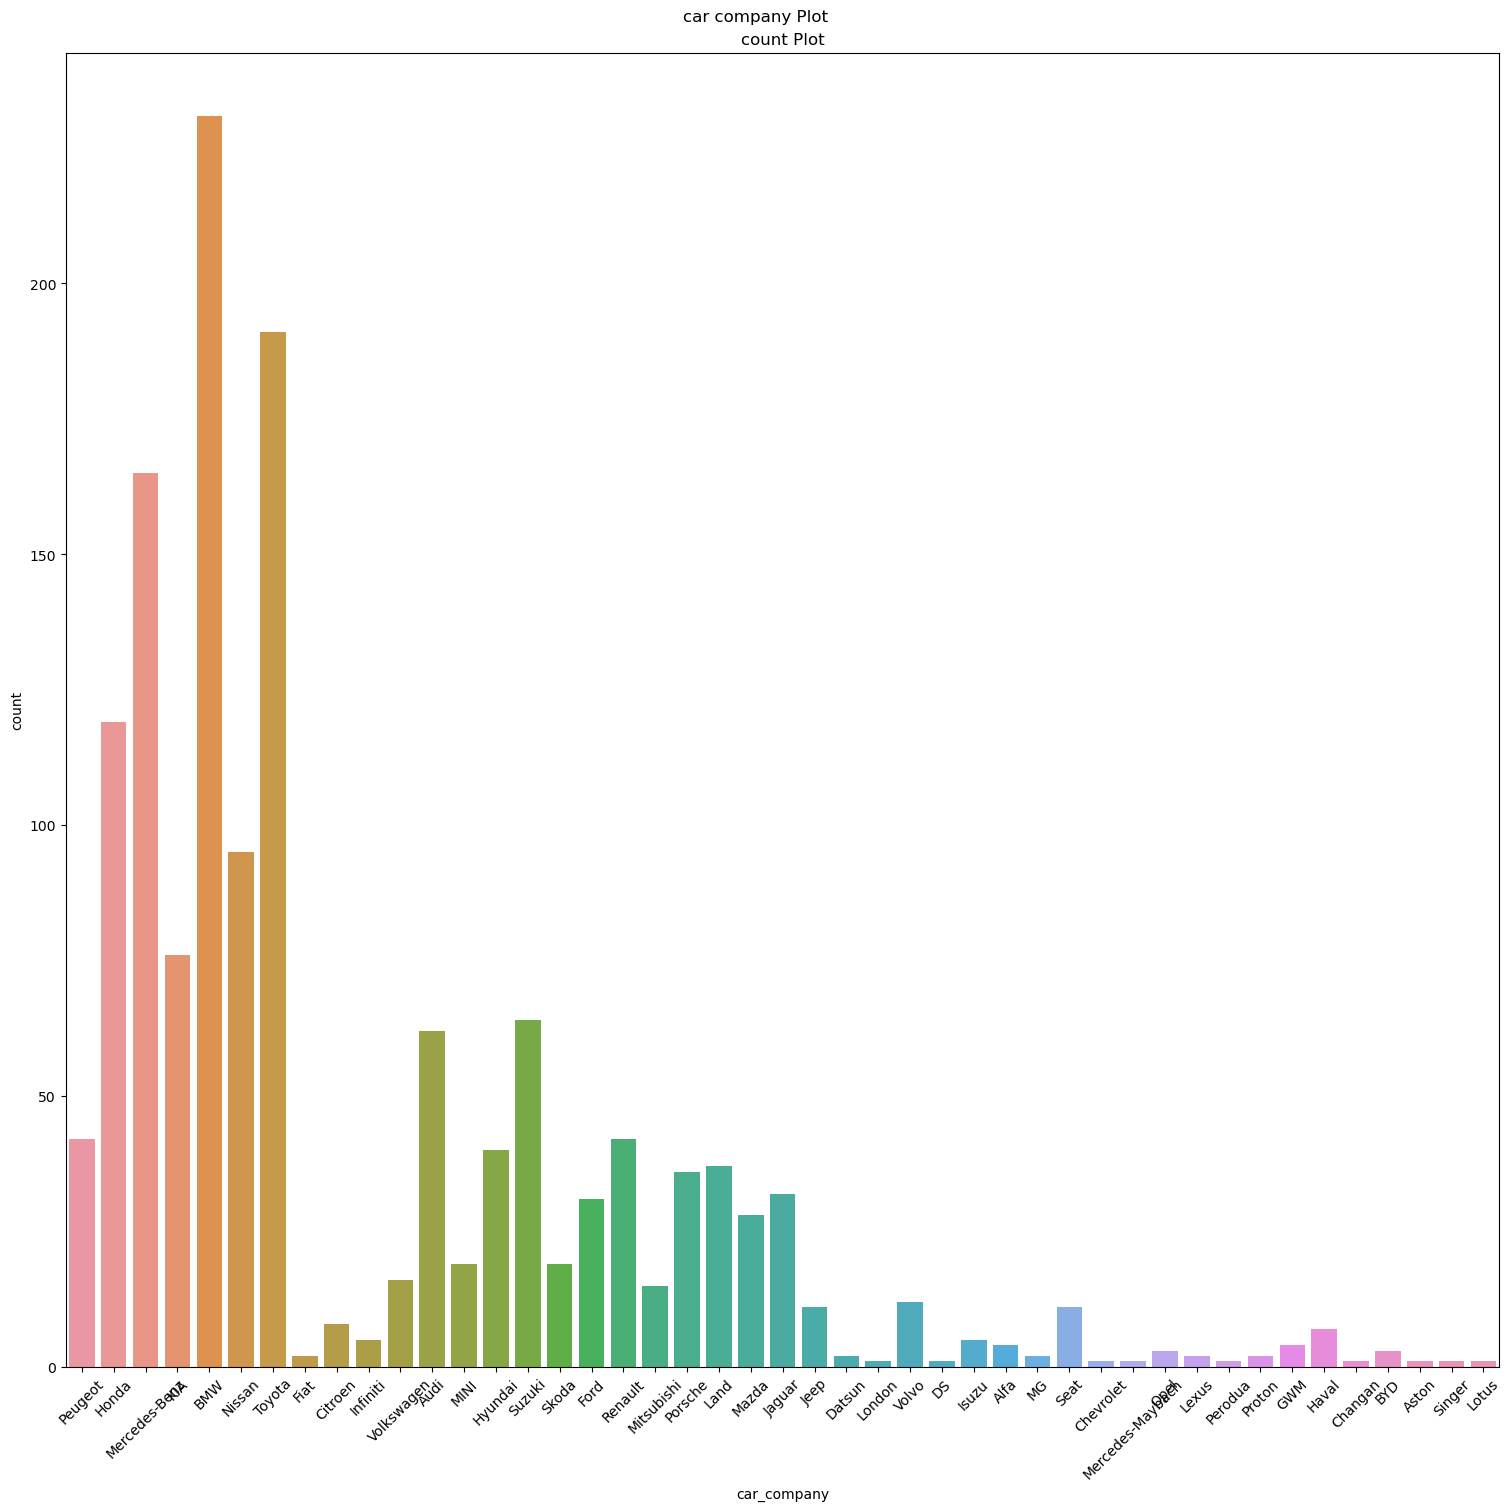

In [106]:
fig, axes = plt.subplots( figsize=(15,15), constrained_layout=True)
fig.suptitle("car company Plot")
    
axes.set_title("count Plot")
sns.countplot(df,x='car_company', ax=axes)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='hybrid_petrol', ylabel='count'>

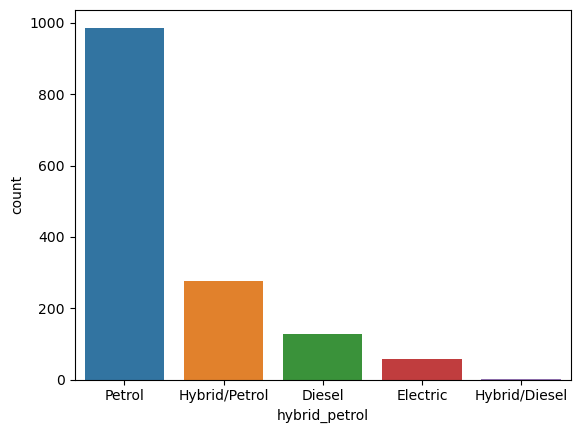

In [11]:
sns.countplot(data=df,x='hybrid_petrol')

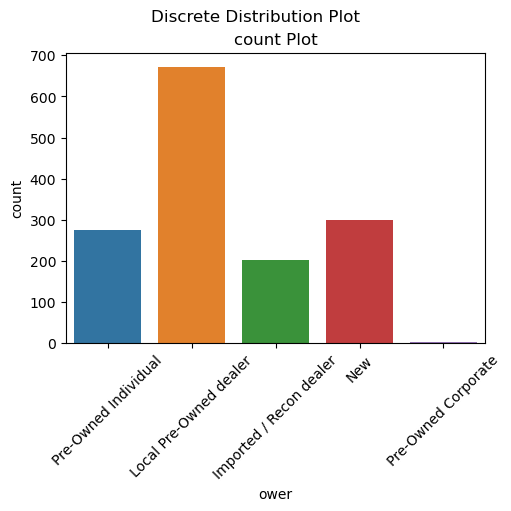

In [12]:
fig, axes = plt.subplots( figsize=(5,5), constrained_layout=True)

    
axes.set_title("count Plot")
sns.countplot(df,x='ower', ax=axes)
plt.xticks(rotation=45)
plt.show()

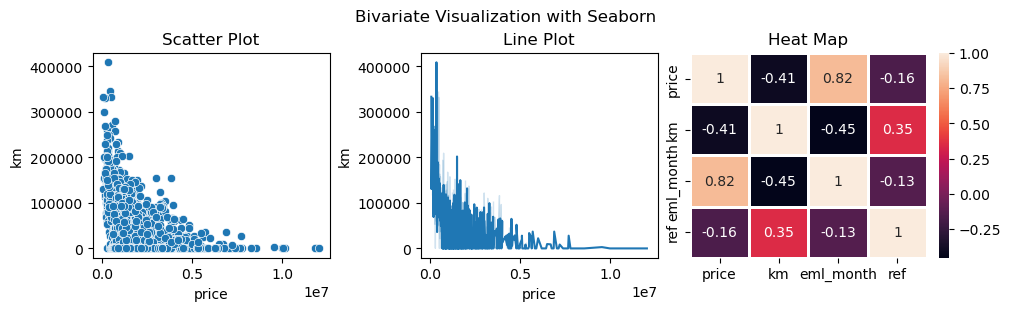

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data=df, x='price', y='km', ax=axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data=df, x='price', y='km', ax=axs[1])


axs[2].set_title("Heat Map")
sns.heatmap(df.select_dtypes(include=['int64']).corr(), annot=True, linewidths=0.8, ax=axs[2])

plt.show()

In [130]:
df.dtypes

car_name          object
price            float64
ower              object
hybrid_petrol     object
km                 int32
eml_month        float64
ref               object
date              object
car_company       object
dtype: object

In [118]:
df['km']=df['km'].replace(np.NaN,00)

In [ ]:
df[]

In [120]:
df[['eml_month']] = df[['eml_month']].astype(float )

<Axes: xlabel='car_company'>

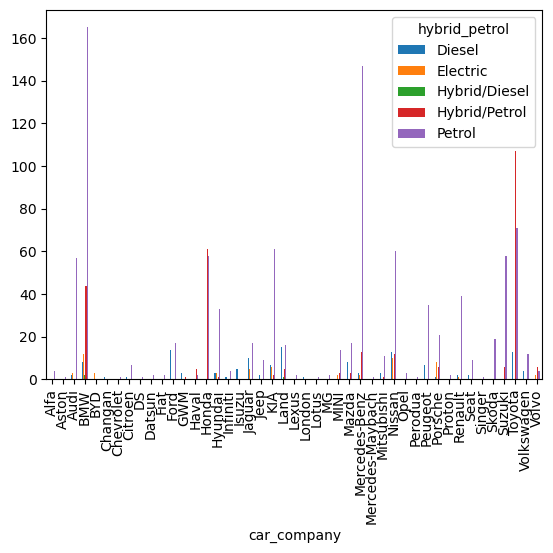

In [125]:
cross_tab=pd.crosstab(df["car_company"],df["hybrid_petrol"])
cross_tab.plot(kind="bar")

In [122]:
df.isnull().sum()

car_name           0
price              0
ower               0
hybrid_petrol      0
km                 0
eml_month          0
ref                0
date             299
car_company        0
dtype: int64

In [131]:
df["date"]=df["date"].str.replace('New','jan')

In [37]:
df['eml_month']=df['eml_month'].astype(float)

In [138]:
df.head()

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date,car_company
0,Peugeot 3008 1.2 - Allure +,850000.0,Pre-Owned Individual,Petrol,105000,0.0,54543,2017-12-01,Peugeot
1,Honda Civic 1.6 Sedan,425000.0,Pre-Owned Individual,Petrol,116200,0.0,54588,2012-08-01,Honda
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000.0,Pre-Owned Individual,Hybrid/Petrol,4622,29253.0,54408,2023-07-01,Mercedes-Benz
3,KIA Cerato 1.6 Sedan - SX,290000.0,Pre-Owned Individual,Petrol,83049,0.0,54671,2011-12-01,KIA
4,BMW 3-series 2.0 Sedan - Sport,1275000.0,Pre-Owned Individual,Petrol,106000,0.0,54685,2014-11-01,BMW


In [16]:
group = df.groupby('car_company')

In [18]:
df=group

In [41]:
g.head()

price                                            car_name  \
             min        max          mean          mean value_counts   
Alfa   1549000.0  2099000.0  1.749500e+06  1.749500e+06          NaN   
Aston  7700000.0  7700000.0  7.700000e+06  7.700000e+06          NaN   
Audi    290000.0  5454000.0  1.798960e+06  1.798960e+06          NaN   
BMW     260000.0  9550000.0  2.075348e+06  2.075348e+06          NaN   
BYD    1976825.0  2995000.0  2.423942e+06  2.423942e+06          NaN   

      eml_month                                               date  
            min       max          mean          mean value_counts  
Alfa        0.0   35553.0  17307.000000  17307.000000          NaN  
Aston       0.0       0.0      0.000000      0.000000          NaN  
Audi        0.0   64365.0  15090.096774  15090.096774          NaN  
BMW         0.0  119383.0  18354.805195  18354.805195          NaN  
BYD     20900.0   31665.0  25627.333333  25627.333333          NaN

In [42]:
group.agg({'price':['min','max','mean','mean']})

price                                      
                       min       max          mean          mean
car_company                                                     
Alfa               1549000   2099000  1.749500e+06  1.749500e+06
Aston              7700000   7700000  7.700000e+06  7.700000e+06
Audi                290000   5454000  1.798960e+06  1.798960e+06
BMW                 260000   9550000  2.075348e+06  2.075348e+06
BYD                1976825   2995000  2.423942e+06  2.423942e+06
Changan            1299000   1299000  1.299000e+06  1.299000e+06
Chevrolet           185000    185000  1.850000e+05  1.850000e+05
Citroen             350000   1950000  1.001250e+06  1.001250e+06
DS                  650000    650000  6.500000e+05  6.500000e+05
Datsun              425000    599000  5.120000e+05  5.120000e+05
Fiat                295000    700000  4.975000e+05  4.975000e+05
Ford                170000   4995000  1.865129e+06  1.865129e+06
GWM                1195000   2299000  1.731000e+06  1.731000e+06
Haval              1495000   1965000  1.703571e+06  1.703571e+06
Honda               249000   2750000  1.108679e+06  1.108679e+06
Hyundai             140000   3399000  9.816125e+05  9.816125e+05
Infiniti           1400000   3850000  3.125000e+06  3.125000e+06
Isuzu               925000   2200000  1.618000e+06  1.618000e+06
Jaguar              950000   6300000  2.626090e+06  2.626090e+06
Jeep                525000   3100000  1.466045e+06  1.466045e+06
KIA                 265000   4795000  1.038987e+06  1.038987e+06
Land                405000   5900000  2.947378e+06  2.947378e+06
Lexus              1950000   2390000  2.170000e+06  2.170000e+06
London             1200000   1200000  1.200000e+06  1.200000e+06
Lotus              3299000   3299000  3.299000e+06  3.299000e+06
MG                 1215000   1268725  1.241862e+06  1.241862e+06
MINI                575000   2660000  1.614474e+06  1.614474e+06
Mazda               115000   3050000  1.191857e+06  1.191857e+06
Mercedes-Benz       180000  10150000  2.113693e+06  2.113693e+06
Mercedes-Maybach  11900000  11900000  1.190000e+07  1.190000e+07
Mitsubishi          190000   2500000  1.020400e+06  1.020400e+06
Nissan               60000   5644444  8.021941e+05  8.021941e+05
Opel                125000    300000  2.333333e+05  2.333333e+05
Perodua              70000     70000  7.000000e+04  7.000000e+04
Peugeot             219000   2450000  1.067674e+06  1.067674e+06
Porsche             900000  12051000  5.612760e+06  5.612760e+06
Proton             1200000   1295000  1.247500e+06  1.247500e+06
Renault             160000   2650000  7.239059e+05  7.239059e+05
Seat                885500   1870000  1.410977e+06  1.410977e+06
Singer              250000    250000  2.500000e+05  2.500000e+05
Skoda              1198000   2710000  1.827321e+06  1.827321e+06
Suzuki              121000   1445000  8.015625e+05  8.015625e+05
Toyota              215000   7385000  1.040618e+06  1.040618e+06
Volkswagen          265000   2300000  1.066812e+06  1.066812e+06
Volvo               250000   4500000  2.822000e+06  2.822000e+06

In [43]:
group.agg({'car_name':['value_counts']})
               

car_name
                                                               value_counts
car_company car_name                                                       
Alfa        Alfa Romeo Giulia 2.0                                         3
            Alfa Romeo Giulia 2.0 - stile                                 1
Aston       Aston Martin Vantage 4.3 Coupe                                1
Audi        Audi Q5 2.0                                                   7
            Audi A4 1.4 Sedan                                             6
...                                                                     ...
Volvo       Volvo XC40 Electric (170kW) - Fully Electric                  1
            Volvo XC60 2.0 - AWD 2.0                                      1
            Volvo XC90 2.0                                                1
            Volvo XC90 2.0 - 7 Seater Inscription Recharge ...            1
            Volvo XC90 2.0 - MHEV                                         1

[1039 rows x 1 columns]

In [46]:
group.agg ({'eml_month':['min','max','mean','mean']})

eml_month                                        
                       min       max           mean           mean
car_company                                                       
Alfa                   0.0   35553.0   17307.000000   17307.000000
Aston                  0.0       0.0       0.000000       0.000000
Audi                   0.0   64365.0   15090.096774   15090.096774
BMW                    0.0  119383.0   18354.805195   18354.805195
BYD                20900.0   31665.0   25627.333333   25627.333333
Changan            13734.0   13734.0   13734.000000   13734.000000
Chevrolet              0.0       0.0       0.000000       0.000000
Citroen                0.0   20617.0   12426.500000   12426.500000
DS                     0.0       0.0       0.000000       0.000000
Datsun              5177.0    7296.0    6236.500000    6236.500000
Fiat                   0.0       0.0       0.000000       0.000000
Ford                   0.0  108520.0   24112.193548   24112.193548
GWM                14556.0   24307.0   18781.750000   18781.750000
Haval              15806.0   20775.0   18011.142857   18011.142857
Honda                  0.0   32480.0   12183.798319   12183.798319
Hyundai                0.0   35936.0   11046.050000   11046.050000
Infiniti               0.0   54200.0   39040.200000   39040.200000
Isuzu                  0.0   23260.0   15150.600000   15150.600000
Jaguar                 0.0   69447.0   28154.531250   28154.531250
Jeep                   0.0   67350.0    6122.727273    6122.727273
KIA                    0.0   50696.0    8634.881579    8634.881579
Land                   0.0   98852.0   30400.702703   30400.702703
Lexus              33029.0   33646.0   33337.500000   33337.500000
London                 0.0       0.0       0.000000       0.000000
Lotus              40185.0   40185.0   40185.000000   40185.000000
MG                     0.0   17105.0    8552.500000    8552.500000
MINI                   0.0   33792.0   17880.105263   17880.105263
Mazda                  0.0   32247.0   10969.607143   10969.607143
Mercedes-Benz          0.0  107312.0   17138.133333   17138.133333
Mercedes-Maybach  125815.0  125815.0  125815.000000  125815.000000
Mitsubishi             0.0   26432.0    9940.000000    9940.000000
Nissan                 0.0   59677.0    7810.410526    7810.410526
Opel                   0.0       0.0       0.000000       0.000000
Perodua                0.0       0.0       0.000000       0.000000
Peugeot                0.0   25903.0    9141.166667    9141.166667
Porsche                0.0  127411.0   56556.694444   56556.694444
Proton             14617.0   15774.0   15195.500000   15195.500000
Renault                0.0   37306.0    6976.952381    6976.952381
Seat                   0.0   19771.0   14743.636364   14743.636364
Singer                 0.0       0.0       0.000000       0.000000
Skoda              12666.0   31468.0   19872.315789   19872.315789
Suzuki                 0.0   16189.0    8177.171875    8177.171875
Toyota                 0.0   78079.0   13809.183246   13809.183246
Volkswagen             0.0   35826.0   10527.875000   10527.875000
Volvo                  0.0   80364.0   37091.500000   37091.500000

In [47]:
group.agg ({'date':['value_counts']})

date
                     value_counts
car_company date                 
Alfa        Jan 2019            1
            Jun 2017            1
            Jun 2020            1
            Oct 2017            1
Aston       Jun 2018            1
...                           ...
Volvo       Jul 2020            1
            Jul 2021            1
            Jun 2019            1
            Nov 1996            1
            Nov 2021            1

[745 rows x 1 columns]

In [78]:
df['eml_month']=df['eml_month'].replace(00,np.NaN)
df['date']=df['date'].replace(00,np.NaN)
df['km']=df['km'].replace(00,np.NaN)

In [80]:
df.head()

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,NaN,54543,Dec 2017
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,NaN,54588,Aug 2012
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,NaN,54671,Dec 2011
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,NaN,54685,Nov 2014


In [84]:
df = df.dropna()

In [90]:
df.shape

(494, 8)

In [37]:
 df.pivot_table(values=["price","km","eml_month"],
                   index=["car_name","ower"])

C:\Users\Abinay Rachakonda\AppData\Local\Temp\ipykernel_18200\564332973.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(values=["price","km","eml_month"],


,,km
car_name,ower,
Alfa Romeo Giulia 2.0,Local Pre-Owned dealer,9.933603e+13
Alfa Romeo Giulia 2.0 - stile,Pre-Owned Individual,7.400000e+04
Aston Martin Vantage 4.3 Coupe,Local Pre-Owned dealer,2.800000e+04
Audi A1 1.0 - Sportback,New,0.000000e+00
Audi A3 1.0 Hatchback,Local Pre-Owned dealer,5.070005e+10
...,...,...
Volvo XC40 Electric (170kW) - Fully Electric,New,0.000000e+00
Volvo XC60 2.0 - AWD 2.0,Pre-Owned Individual,2.072600e+04
Volvo XC90 2.0,Local Pre-Owned dealer,4.000000e+04


In [104]:
df= pd.read_csv(r"C:\Users\Abinay Rachakonda\Downloads\mycar.mu.csv")

In [106]:
df.head()

,car_name,price,owner,hybrid_petrol,km,emi_month,ref,date
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,0,54543,2017-12-01
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,0,54588,2012-08-01
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,2023-07-01
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,0,54671,2011-12-01
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,0,54685,2014-11-01


In [108]:
df.pivot_table(values=["price","emi_month"],
               index=['car_name',"owner","km"])

emi_month  \
car_name                                           owner                  km                 
Alfa Romeo Giulia 2.0                              Local Pre-Owned dealer 29800    35553.0   
                                                                          81000        0.0   
                                                                          83172        0.0   
Alfa Romeo Giulia 2.0 - stile                      Pre-Owned Individual   74000    33675.0   
Aston Martin Vantage 4.3 Coupe                     Local Pre-Owned dealer 28000        0.0   
...                                                                                    ...   
Volvo XC40 Electric (170kW) - Fully Electric       New                    0        34097.0   
Volvo XC60 2.0 - AWD 2.0                           Pre-Owned Individual   20726    32888.0   
Volvo XC90 2.0                                     Local Pre-Owned dealer 40000    80364.0   
Volvo XC90 2.0 - 7 Seater Inscription Recharge ... Pre-Owned Individual   29000    56170.0   
Volvo XC90 2.0 - MHEV                              New                    0        47577.0   

                                                                                   price  
car_name                                           owner                  km              
Alfa Romeo Giulia 2.0                              Local Pre-Owned dealer 29800  2099000  
                                                                          81000  1549000  
                                                                          83172  1800000  
Alfa Romeo Giulia 2.0 - stile                      Pre-Owned Individual   74000  1550000  
Aston Martin Vantage 4.3 Coupe                     Local Pre-Owned dealer 28000  7700000  
...                                                                                  ...  
Volvo XC40 Electric (170kW) - Fully Electric       New                    0      3225000  
Volvo XC60 2.0 - AWD 2.0                           Pre-Owned Individual   20726  2700000  
Volvo XC90 2.0                                     Local Pre-Owned dealer 40000  3699000  
Volvo XC90 2.0 - 7 Seater Inscription Recharge ... Pre-Owned Individual   29000  3990000  
Volvo XC90 2.0 - MHEV                              New                    0      4500000  

[1441 rows x 2 columns]